400 breast cancer patients who underwent surgery for the treatment of breast cancer.

Patient_ID: ID of the patient  
Age: Age of the patient  
Gender: Gender of the patient  
Protein1, Protein2, Protein3, Protein4: expression levels  
Tumor_Stage: Breast cancer stage of the patient  
Histology: Infiltrating Ductal Carcinoma, Infiltration Lobular Carcinoma, Mucinous Carcinoma  
ER status: Positive/Negative  
PR status: Positive/Negative  
HER2 status: Positive/Negative  
Surgery_type: Lumpectomy, Simple Mastectomy, Modified Radical Mastectomy, Other  
DateofSurgery: The date of Surgery  
DateofLast_Visit: The date of the last visit of the patient  
Patient_Status: Alive/Dead  

### So by using this dataset, our task is to predict whether a breast cancer patient will survive or not after the surgery.

In [5]:
import os
path=os.getcwd()
os.chdir(path+'/projectii')

In [1]:
import os
os.getcwd()
os.chdir('projectii/')

# Data Analysis

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("BRCA.csv")
data.head()

Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Modified Radical Mastectomy       15-Jan-17          19-Jun-17   
1                   Lumpectomy       26-Apr-17          09-Nov-18   
2                        Other       08-Sep-17          09-Jun-18   
3  Modified Radical Mastectomy       25-Jan-17          12-Jul-17   
4                        Other       06-May-17          27-Jun-19   

  Patient_Status  
0          Alive  
1           Dead  
2          Alive  
3          Alive  
4           Dead

In [3]:
data=data.drop(columns=['Patient_ID'])

Drop Id column

In [4]:
data.shape

(341, 15)

In [5]:
data.describe()

Age    Protein1    Protein2    Protein3    Protein4
count  334.000000  334.000000  334.000000  334.000000  334.000000
mean    58.886228   -0.029991    0.946896   -0.090204    0.009819
std     12.961212    0.563588    0.911637    0.585175    0.629055
min     29.000000   -2.340900   -0.978730   -1.627400   -2.025500
25%     49.000000   -0.358888    0.362173   -0.513748   -0.377090
50%     58.000000    0.006129    0.992805   -0.173180    0.041768
75%     68.000000    0.343598    1.627900    0.278353    0.425630
max     90.000000    1.593600    3.402200    2.193400    1.629900

In [6]:
data.isnull().sum()

Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

Drop nulls

In [7]:
data = data.dropna()
data = data.reset_index(drop=True)
# Convert 'Date_of_Surgery' and 'Date_of_Last_Visit' to datetime
data['Date_of_Surgery'] = pd.to_datetime(data['Date_of_Surgery'], errors='coerce')
data['Date_of_Last_Visit'] = pd.to_datetime(data['Date_of_Last_Visit'], errors='coerce')

# Calculate the difference in days between 'Date_of_Last_Visit' and 'Date_of_Surgery'
data['Days_between_Surgery_and_Last_Visit'] = (data['Date_of_Last_Visit'] - data['Date_of_Surgery']).dt.days

# Handle missing values if any (optional)
data['Days_between_Surgery_and_Last_Visit'].fillna(data['Days_between_Surgery_and_Last_Visit'].median(), inplace=True)

# Drop the original date columns if they are no longer needed
data = data.drop(columns=['Date_of_Surgery', 'Date_of_Last_Visit'])

/tmp/ipykernel_54696/3092516903.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date_of_Surgery'] = pd.to_datetime(data['Date_of_Surgery'], errors='coerce')
/tmp/ipykernel_54696/3092516903.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date_of_Last_Visit'] = pd.to_datetime(data['Date_of_Last_Visit'], errors='coerce')


We calculated the amount of days(new column) since the surgery and dropped both dates columns

In [8]:
data_ = data.select_dtypes(exclude=['int', 'float'])
for col in data_.columns:
    print(f"variable {col}:\n\tN values:{len(data_[col].unique())} \n\tValues: {data_[col].unique()}") 

variable Gender:
	N values:2 
	Values: ['FEMALE' 'MALE']
variable Tumour_Stage:
	N values:3 
	Values: ['III' 'II' 'I']
variable Histology:
	N values:3 
	Values: ['Infiltrating Ductal Carcinoma' 'Mucinous Carcinoma'
 'Infiltrating Lobular Carcinoma']
variable ER status:
	N values:1 
	Values: ['Positive']
variable PR status:
	N values:1 
	Values: ['Positive']
variable HER2 status:
	N values:2 
	Values: ['Negative' 'Positive']
variable Surgery_type:
	N values:4 
	Values: ['Modified Radical Mastectomy' 'Lumpectomy' 'Other' 'Simple Mastectomy']
variable Patient_Status:
	N values:2 
	Values: ['Alive' 'Dead']


ER Status and PR Status only have a unique value. We dropped them thus they won't give any info

In [9]:
data=data.drop(columns=['ER status','PR status'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  317 non-null    float64
 1   Gender                               317 non-null    object 
 2   Protein1                             317 non-null    float64
 3   Protein2                             317 non-null    float64
 4   Protein3                             317 non-null    float64
 5   Protein4                             317 non-null    float64
 6   Tumour_Stage                         317 non-null    object 
 7   Histology                            317 non-null    object 
 8   HER2 status                          317 non-null    object 
 9   Surgery_type                         317 non-null    object 
 10  Patient_Status                       317 non-null    object 
 11  Days_between_Surgery_and_Last_Vi

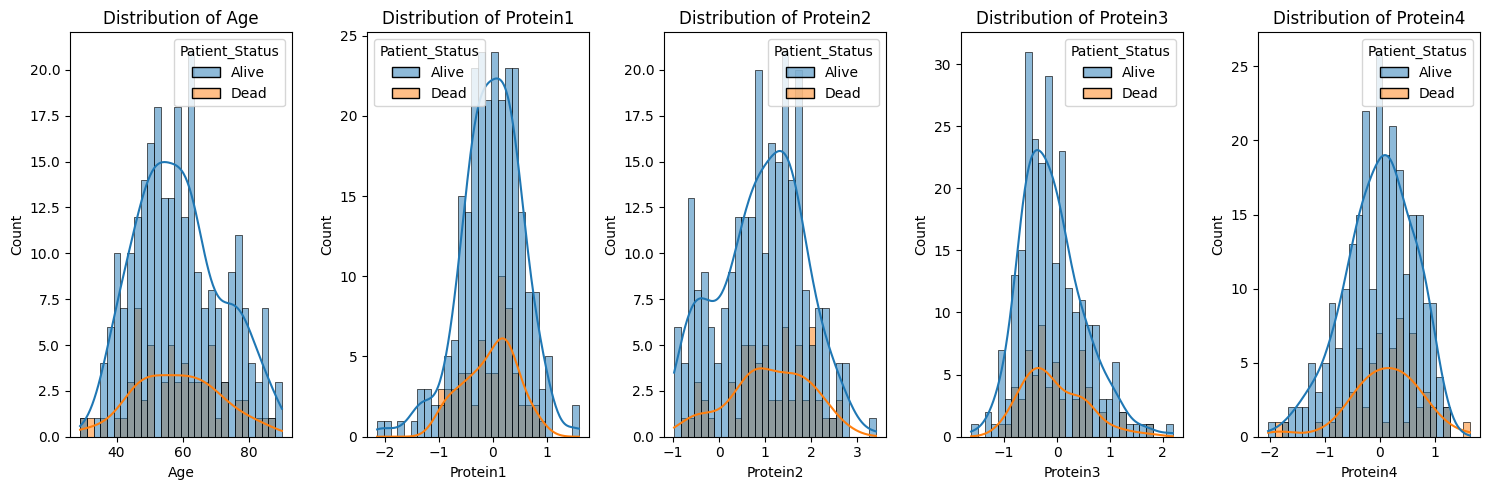

In [11]:
# selecting numerical columns for analysis
numerical_columns = ['Age', 'Protein1', 'Protein2','Protein3','Protein4']

# plotting distributions of numerical features
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 5, i)
    sns.histplot(data, x=column, hue="Patient_Status", bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [12]:
# Tumour Stage
gender = data["Gender"].value_counts()
transactions = gender.index
quantity = gender.values
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Gender Distribution")
figure.show()

Makes senses, breast cancer is related mostly with women.

In [13]:
data[(data['Gender']=='MALE')]

Age Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
5    84.0   MALE -0.081872   1.72410 -0.057335  0.043025          III   
148  51.0   MALE  0.837890   0.50642 -0.545130  0.314900           II   
259  68.0   MALE  1.470400   0.46900  0.135540 -0.289840           II   
313  44.0   MALE  0.732720   1.11170 -0.269520 -0.354920           II   

                          Histology HER2 status                 Surgery_type  \
5     Infiltrating Ductal Carcinoma    Negative  Modified Radical Mastectomy   
148  Infiltrating Lobular Carcinoma    Negative            Simple Mastectomy   
259   Infiltrating Ductal Carcinoma    Negative  Modified Radical Mastectomy   
313  Infiltrating Lobular Carcinoma    Negative                        Other   

    Patient_Status  Days_between_Surgery_and_Last_Visit  
5            Alive                                 1519  
148          Alive                                  665  
259          Alive                                  359  
313           Dead                                  124

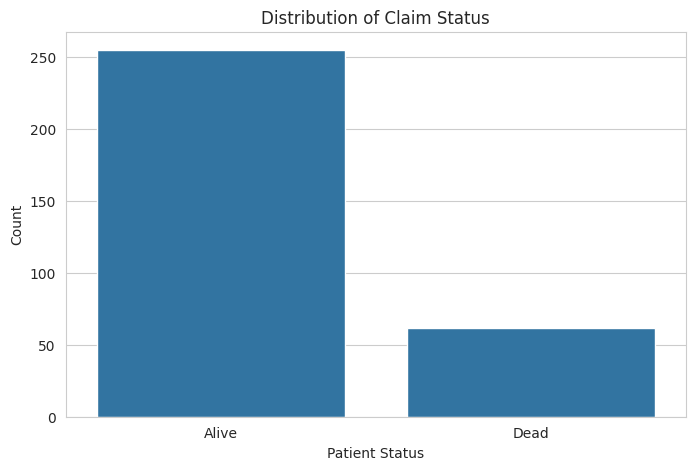

In [14]:
sns.set_style("whitegrid")

# plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(8, 5))
sns.countplot(x='Patient_Status', data=data)
plt.title('Distribution of Claim Status')
plt.xlabel('Patient Status')
plt.ylabel('Count')
plt.show()

In [15]:
# Tumour Stage
stage = data["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Tumour Stages of Patients")
figure.show()

In [16]:
# Histology
histology = data["Histology"].value_counts()
transactions = histology.index
quantity = histology.values
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Histology of Patients")
figure.show()

In [17]:
print(data["HER2 status"].value_counts())

HER2 status
Negative    288
Positive     29
Name: count, dtype: int64


This test measures the amount of HER2 proteins found on breast cancer cells. The score will either be 0 to 1+ (HER2 negative), 2+ (borderline) or 3+ (HER2-positive).

In [18]:
data[(data['HER2 status']=='Positive') & (data['Patient_Status']=='Dead')]

Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
23   79.0  FEMALE -0.036229   0.79551 -0.013525   1.62990           II   
153  76.0  FEMALE -0.863790  -0.11864  0.070765   0.75067          III   
312  36.0  FEMALE  0.231800   0.61804 -0.557790  -0.51735          III   
315  79.0  FEMALE  0.479400   2.05590 -0.531360  -0.18848            I   

                          Histology HER2 status                 Surgery_type  \
23               Mucinous Carcinoma    Positive  Modified Radical Mastectomy   
153  Infiltrating Lobular Carcinoma    Positive                        Other   
312   Infiltrating Ductal Carcinoma    Positive            Simple Mastectomy   
315   Infiltrating Ductal Carcinoma    Positive                   Lumpectomy   

    Patient_Status  Days_between_Surgery_and_Last_Visit  
23            Dead                                   55  
153           Dead                                  304  
312           Dead                                   90  
315           Dead                                  456

In [19]:
# Surgery_type
surgery = data["Surgery_type"].value_counts()
transactions = surgery.index
quantity = surgery.values
figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Type of Surgery of Patients")
figure.show()

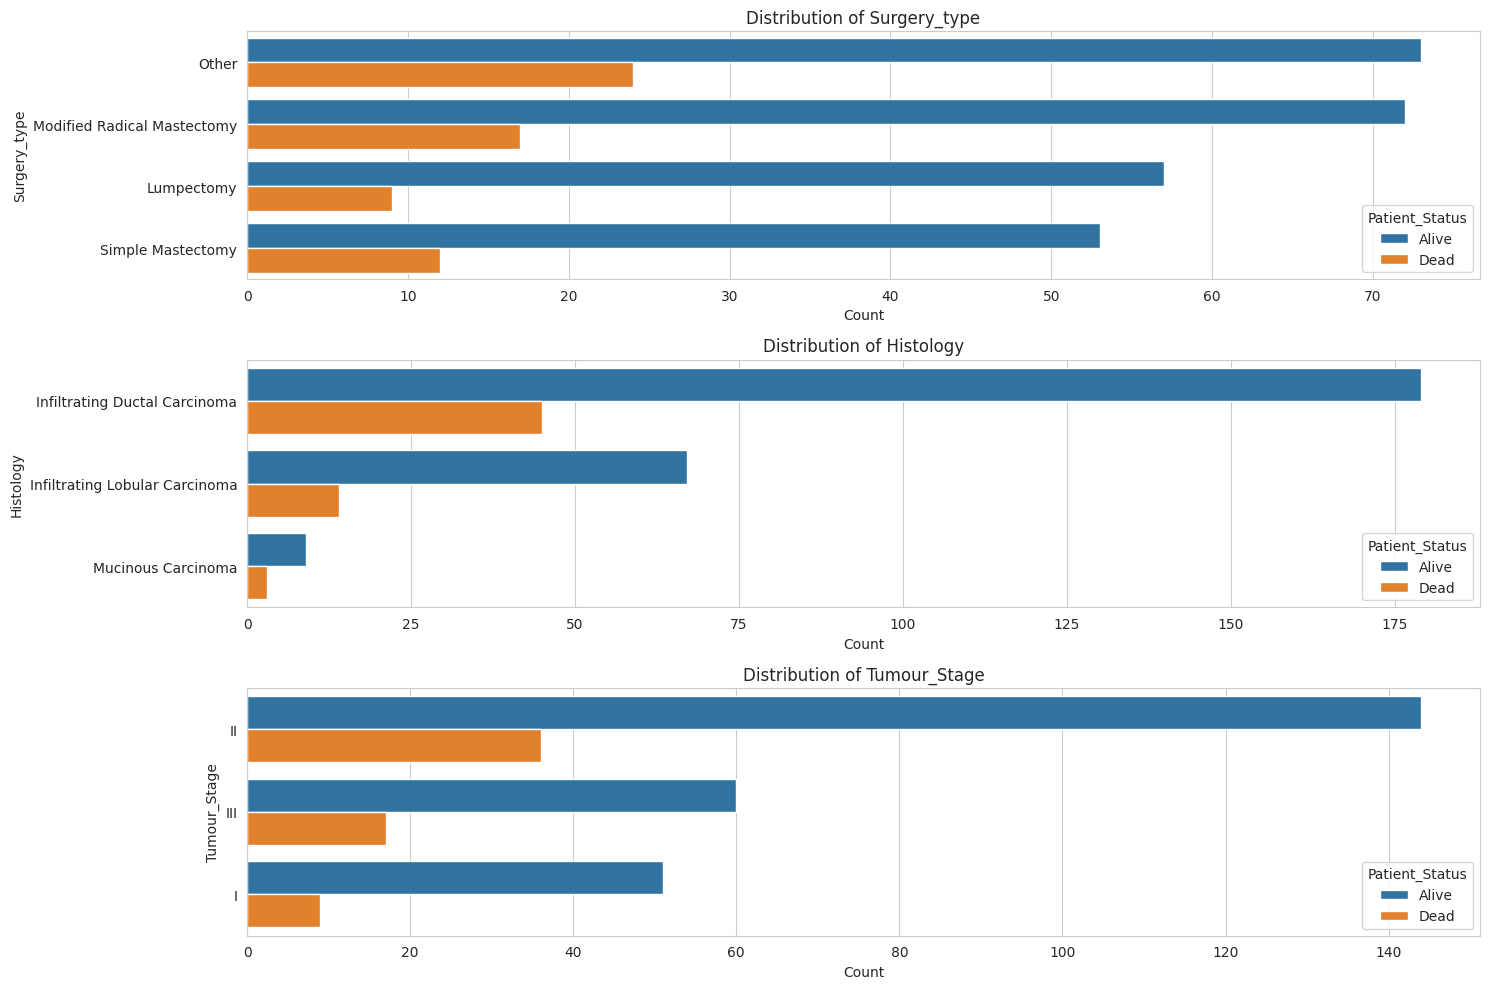

In [20]:
# selecting some relevant categorical columns for analysis
categorical_columns = ['Surgery_type', 'Histology', 'Tumour_Stage']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=data, order = data[column].value_counts().index,hue='Patient_Status')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

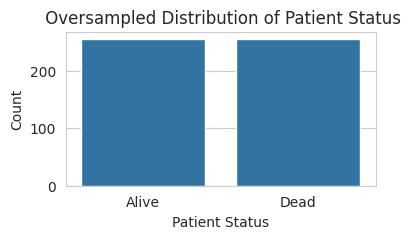

In [21]:
from sklearn.utils import resample

# separate majority and minority classes
majority = data[data.Patient_Status == 'Alive']
minority = data[data.Patient_Status == 'Dead']

# oversample the minority class
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority))

# combine majority class with oversampled minority class
oversampled_data = pd.concat([majority, minority_oversampled])

# check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data.Patient_Status.value_counts()

plt.figure(figsize=(4,2))
sns.countplot(x='Patient_Status', data=oversampled_data)
plt.title(' Oversampled Distribution of Patient Status')
plt.xlabel('Patient Status')
plt.ylabel('Count')
plt.show()

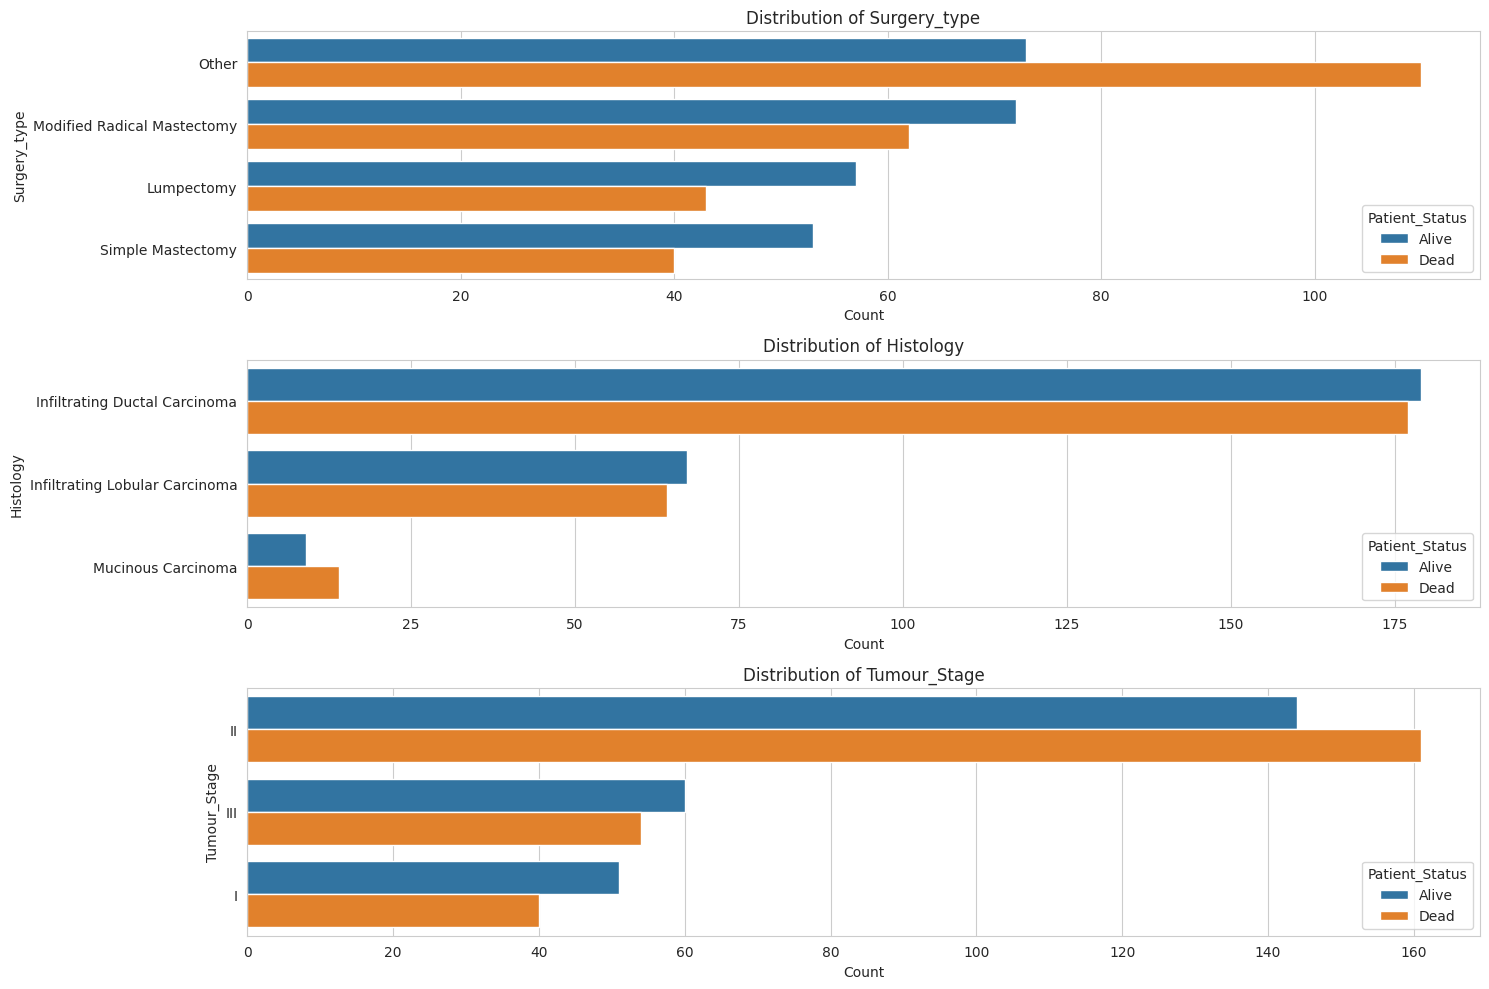

In [22]:
# selecting some relevant categorical columns for analysis
categorical_columns = ['Surgery_type', 'Histology', 'Tumour_Stage']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=oversampled_data, order = oversampled_data[column].value_counts().index,hue='Patient_Status')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [23]:
oversampled_data.head()

Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0  36.0  FEMALE  0.080353   0.42638  0.547150  0.273680          III   
2  69.0  FEMALE  0.213980   1.31140 -0.327470 -0.234260          III   
3  56.0  FEMALE  0.345090  -0.21147 -0.193040  0.124270           II   
5  84.0    MALE -0.081872   1.72410 -0.057335  0.043025          III   
6  53.0  FEMALE -0.069535   1.41830 -0.361050  0.391580           II   

                       Histology HER2 status                 Surgery_type  \
0  Infiltrating Ductal Carcinoma    Negative  Modified Radical Mastectomy   
2  Infiltrating Ductal Carcinoma    Negative                        Other   
3  Infiltrating Ductal Carcinoma    Negative  Modified Radical Mastectomy   
5  Infiltrating Ductal Carcinoma    Negative  Modified Radical Mastectomy   
6  Infiltrating Ductal Carcinoma    Negative            Simple Mastectomy   

  Patient_Status  Days_between_Surgery_and_Last_Visit  
0          Alive                                  155  
2          Alive                                  274  
3          Alive                                  168  
5          Alive                                 1519  
6          Alive                                  368

In [24]:
oversampled_data["Tumour_Stage"] = oversampled_data["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
oversampled_data["Histology"] = oversampled_data["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
oversampled_data["HER2 status"] = oversampled_data["HER2 status"].map({"Positive": 1, "Negative": 2})
oversampled_data["Gender"] = oversampled_data["Gender"].map({"MALE": 0, "FEMALE": 1})
oversampled_data["Surgery_type"] = oversampled_data["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})
print(oversampled_data.head())

    Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0  36.0       1  0.080353   0.42638  0.547150  0.273680             3   
2  69.0       1  0.213980   1.31140 -0.327470 -0.234260             3   
3  56.0       1  0.345090  -0.21147 -0.193040  0.124270             2   
5  84.0       0 -0.081872   1.72410 -0.057335  0.043025             3   
6  53.0       1 -0.069535   1.41830 -0.361050  0.391580             2   

   Histology  HER2 status  Surgery_type Patient_Status  \
0          1            2             2          Alive   
2          1            2             1          Alive   
3          1            2             2          Alive   
5          1            2             2          Alive   
6          1            2             4          Alive   

   Days_between_Surgery_and_Last_Visit  
0                                  155  
2                                  274  
3                                  168  
5                                 1519  
6      

# Data Models

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

X = oversampled_data.drop(columns=['Patient_Status'])
y = oversampled_data['Patient_Status']

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



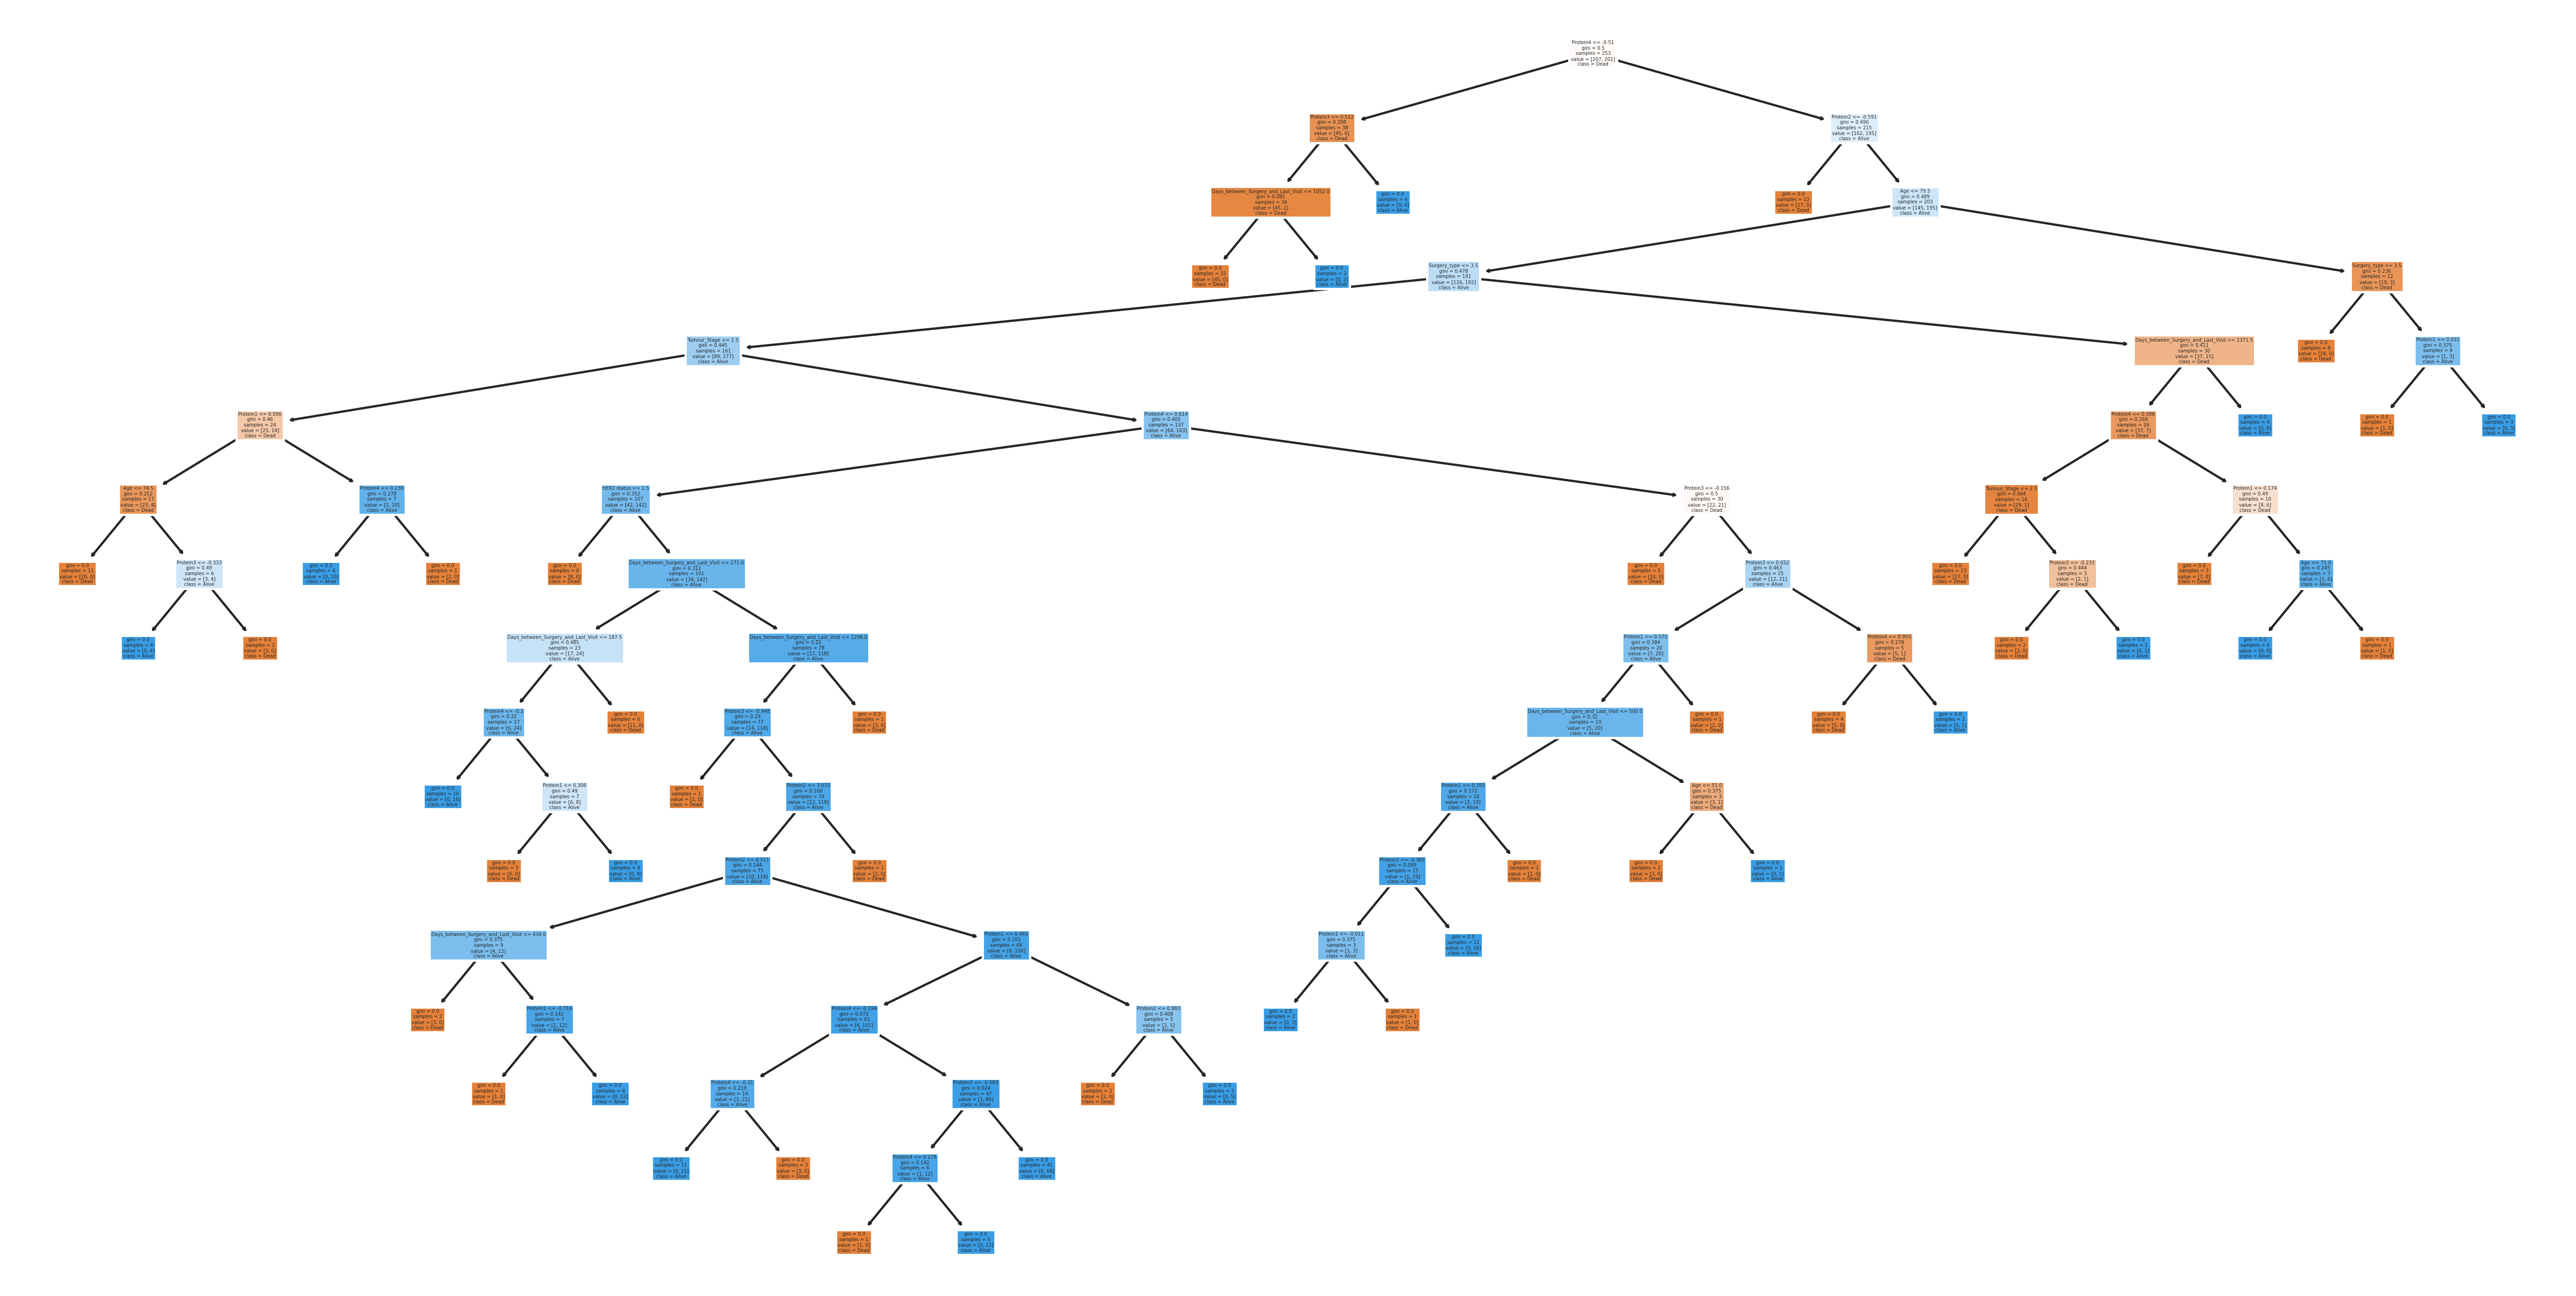

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Split the data (not strictly necessary for GridSearchCV, but good for initial check)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
dt = DecisionTreeClassifier(random_state=42)

bagging_model = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=42, n_jobs=-1)
bagging_model.fit(X_train, y_train)

first = bagging_model.estimators_[0]
# Plot the decision tree
plt.figure(figsize=(20,10),dpi=350)
plot_tree(first, filled=True, feature_names=X.columns, class_names=['Dead', 'Alive'])  # Adjust class names if necessary
plt.savefig('dt.png',format='png',bbox_inches='tight')
plt.show()

We rained a decision tree using bootstrap aggregating(bagging). Prevents overfitting and improves accuracy training 100 different DT with random samples and the maks prediction on the highest voted class

0.9591836734693877
0.8867924528301887


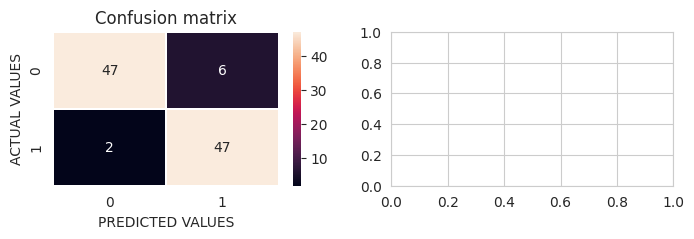

In [27]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = bagging_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1,2,figsize=(8,2))
sns.heatmap(conf_matrix, annot=True, linewidths = 0.01, ax = ax[0])
ax[0].set_title('Confusion matrix')
ax[0].set_xlabel('PREDICTED VALUES')
ax[0].set_ylabel('ACTUAL VALUES')

print(recall_score(y_test, y_pred, pos_label='Dead'))
print(precision_score(y_test, y_pred, pos_label='Dead'))


Recall is 1 because FN=0. That means out DT did not assign an alive class to a dead patient.

Precision is 0.84 because our number of FP=9 which means our model assigned a patient as Dead but he is actually Alive.

In the healthcare sector is better yo focus on the recall as we do not want to predict as alive a person who is likely to die because of cancer.
In that sense, our model is perfect.

0.9591836734693877
0.9038461538461539


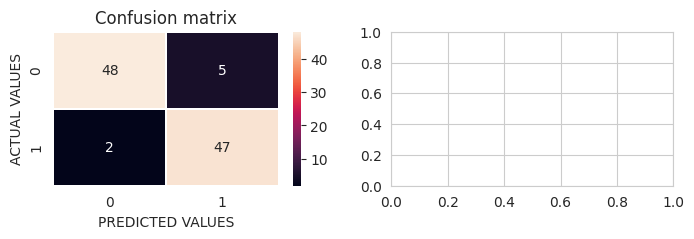

In [28]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(1,2,figsize=(8,2))
sns.heatmap(conf_matrix, annot=True, linewidths = 0.01, ax = ax[0])
ax[0].set_title('Confusion matrix')
ax[0].set_xlabel('PREDICTED VALUES')
ax[0].set_ylabel('ACTUAL VALUES')

print(recall_score(y_test, y_pred, pos_label='Dead'))
print(precision_score(y_test, y_pred, pos_label='Dead'))

With a rf we get an even better precision of 0.92

Main difference between rf and dt with bagging: rf selects random subset of features at each split, making more robust to overfitting

#TEST 1 with a branch